How does a computer see an image
_ grid of pixels > binary value <br>

Image is a vector < 0 to 255 > rescaling image/reshaping


Size of the input layer is equal to the number of pixels in the image > output is equal to the number of classes we have

network the size of the input layer is therefore equal to the number of pixels in the image which is

784 and the size of the output is equal to the number of classes we have in our problem.

In this case 10 the number of digits between 0 and 9 in these V-2 we've learned how to design a fully

In [9]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os
from os.path import join

import skimage
from skimage import data, io

In [7]:
plt.rcParams["figure.figsize"] = (8,8)



## Images and Python

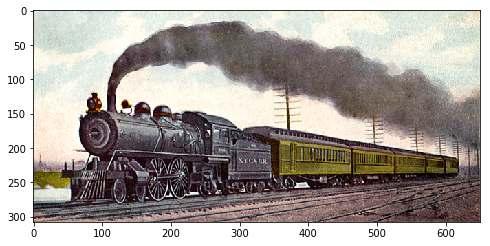

In [8]:
#Load the image
img = io.imread(join("images", "color_train.jpg"))
plt.imshow(img)

In [9]:
# The shape of the image
img.shape

(308, 650, 3)

## Transformations

In [10]:
from skimage import transform

(154, 325, 3)

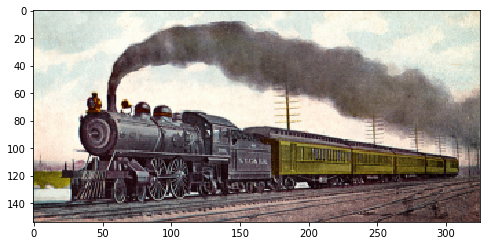

In [12]:
# Rescale image by a factor 0.5
rescaled_img = transform.rescale(img, scale=0.5, mode='constant', multichannel=True, anti_aliasing=True)
plt.imshow(rescaled_img)
rescaled_img.shape

(200, 200, 3)

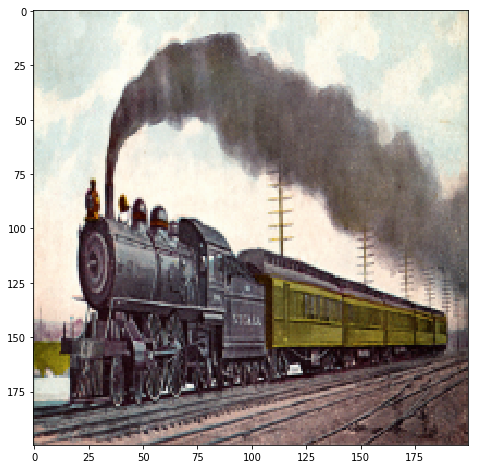

In [14]:
# Resize image to have a square size of 200 x 200 pixels
resized_img = transform.resize(img, (200,200), mode='constant', anti_aliasing=True)
plt.imshow(resized_img)
resized_img.shape

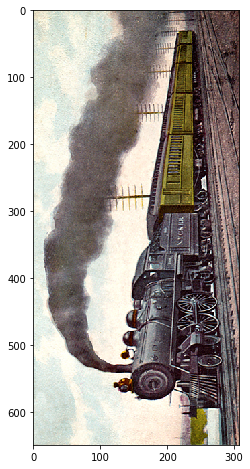

In [15]:
# Rotate image by 90° counter-clockwise
rotated_img = transform.rotate(img, 90, resize=True)
plt.imshow(rotated_img)

## Convolutions

Extract features fom an image.<br>
Learn best features from image 
Values of pixels correlated horizontally and vertically
2-d patterns > specific to a particular image
Capture these patterns automatically
recognize objects in images. <br>
Convolution > mathematical operation to find local patterns

In [16]:
from scipy.ndimage.filters import convolve
from scipy import ndimage as ndi
from scipy.signal import convolve2d
from scipy import misc
from skimage import filters

### Blur (Guassian Filter)

In [17]:
x = np.zeros((101, 101))
x[50, 50] = 1
y = ndi.filters.gaussian_filter(x, sigma=16)

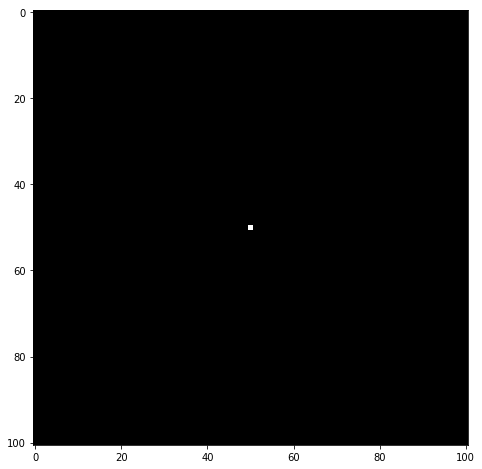

In [18]:
plt.imshow(x, interpolation='none', cmap='gray')

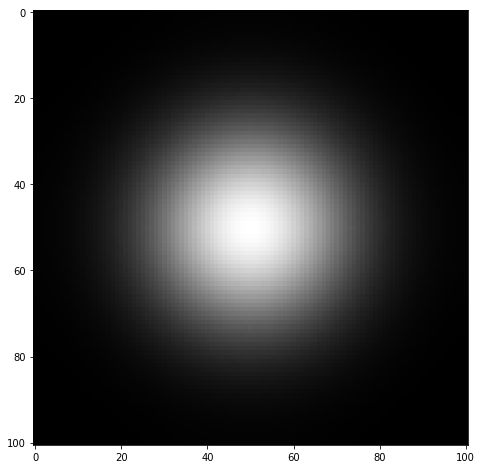

In [19]:
plt.imshow(y, interpolation='none', cmap='gray')

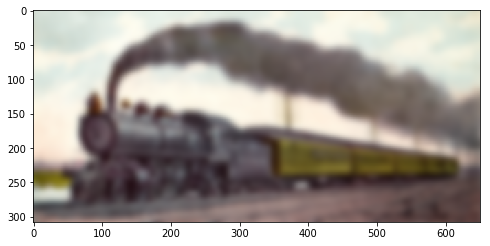

In [20]:
blurred_image = filters.gaussian(img, 5, multichannel=True)
plt.imshow(blurred_image)

In [21]:
## Convolutions with images

In [22]:
# Convert a color image to grayscale image
grayscale_image = io.imread(join("images", "color_train.jpg"), as_gray=True)

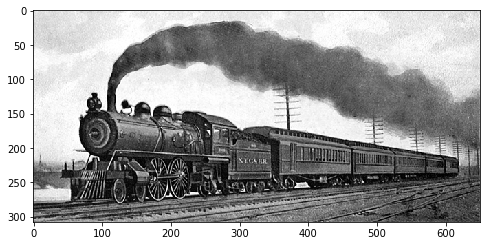

In [23]:
plt.imshow(grayscale_image, cmap='gray')

### Edge Detection (Sobel Operator)

In [24]:
h_kernel = np.array([[ 1,  2,  1],
                     [ 0,  0,  0],
                     [-1, -2, -1]])

v_kernel = np.array([[ -1,  0,  1],
                     [ -2,  0,  2],
                     [-1, 0, 1]])



# a1 = np.matrix([1, 2, 1])
# a2 = np.matrix([-1, 0, 1])
# h_kernel = a1.T * a2
# v_kernel = a2.T * a1

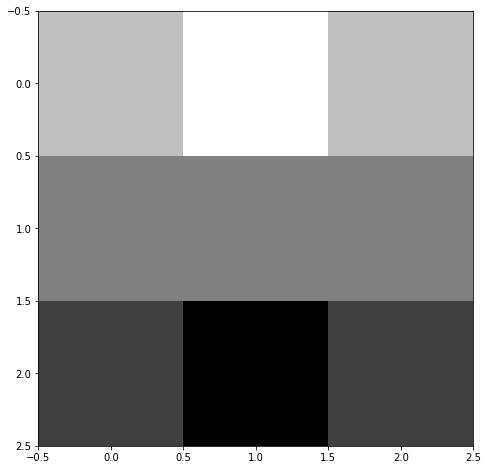

In [25]:
plt.imshow(h_kernel, cmap='gray')

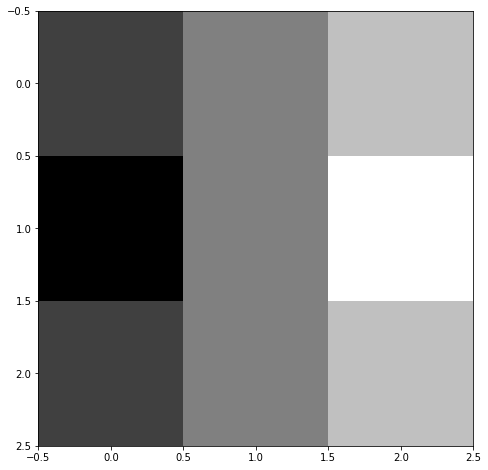

In [26]:
plt.imshow(v_kernel, cmap='gray')

In [27]:
# Apply the Sobel operator
Gx = convolve2d(grayscale_image, h_kernel)
Gy = convolve2d(grayscale_image, v_kernel)
G = np.sqrt(Gx**2 + Gy**2)

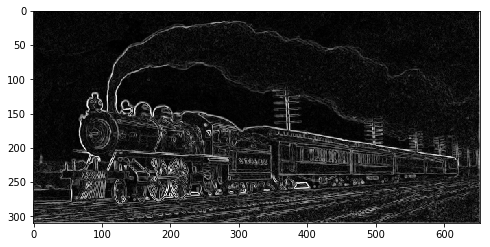

In [28]:
plt.imshow(G, cmap='gray')

In [29]:
sobel_h = filters.sobel_h(grayscale_image)
sobel_v = filters.sobel_v(grayscale_image)
sobel = filters.sobel(grayscale_image)

(-0.5, 649.5, 307.5, -0.5)

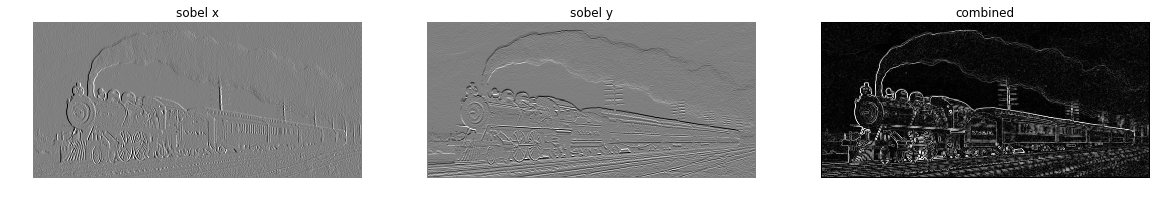

In [30]:
# Formatting plot
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.title('sobel x')
plt.imshow(sobel_v, cmap='gray')
plt.axis('off')
plt.subplot(1,3,2)
plt.title('sobel y')
plt.imshow(sobel_h, cmap='gray')
plt.axis('off')
plt.subplot(1,3,3)
plt.title('combined')
plt.imshow(sobel, cmap='gray')
plt.axis('off')

## Building your own Convolutional Neural Network

In [31]:
##Explain the MNIST set of handwritten digits

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.
/Users/melvinwevers/virtualenvs/cv_course/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/melvinwevers/virtualenvs/cv_course/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data('/tmp/mnist.npz')

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
plt.imshow(X_train[0], cmap='gray')

NameError: name 'plt' is not defined

In [104]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [105]:
X_train.shape

(60000, 784)

In [106]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [107]:
# from integers to floats.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [108]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [10]:
from keras.utils.np_utils import to_categorical

In [11]:
y_train[0]

5

In [12]:
# go to 10 binary columns
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [13]:
y_train_cat.shape

(60000, 10)

In [14]:
y_test_cat.shape

(10000, 10)

In [15]:
y_train[0]

5

In [16]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import MaxPool2D, AvgPool2D, Conv2D
from keras.layers import Flatten, Activation
import keras.backend as K

In [18]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [124]:
K.clear_session()

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1))) #convolution layer 32 filters (3 x 3 pixels), output 26x26
model.add(MaxPool2D(pool_size=(2, 2))) # pooling layer to reduce size output is 13x13 
model.add(Activation('relu')) 

model.add(Flatten()) #flatten tensor into long array

model.add(Dense(128, activation='relu')) 

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [125]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [135]:
h = model.fit(X_train, y_train_cat, batch_size=128,
          epochs=3, verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/3
42000/42000 [==============================] - 13s 321us/step - loss: 0.0264 - acc: 0.9923 - val_loss: 0.0599 - val_acc: 0.9825
Epoch 2/3
42000/42000 [==============================] - 13s 310us/step - loss: 0.0197 - acc: 0.9941 - val_loss: 0.0528 - val_acc: 0.9846
Epoch 3/3
42000/42000 [==============================] - 13s 307us/step - loss: 0.0137 - acc: 0.9960 - val_loss: 0.0605 - val_acc: 0.9841


In [112]:
# in 2 epochs already performing better than fully-connected model

In [111]:
model.evaluate(X_test, y_test_cat)

10000/10000 [==============================] - 1s 108us/step


[0.0741386724550277, 0.9769]

10000/10000 [==============================] - 1s 115us/step


0.9857

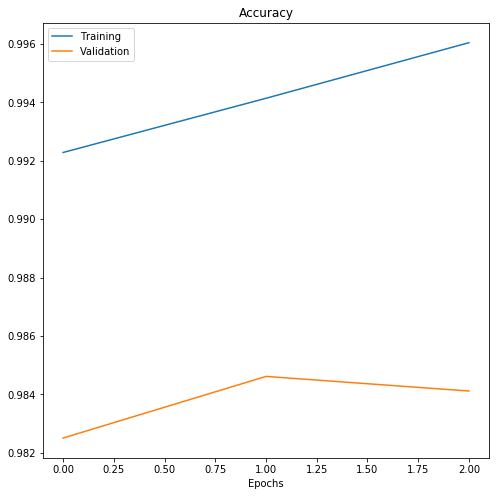

In [136]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

test_accuracy = model.evaluate(X_test, y_test_cat)[1]
test_accuracy

## Image classification

In [19]:
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input, decode_predictions
from keras.models import Model

The VGG19 model was trained to identify 1000 classes of objects within an image. <br>It was built as part of the ImageNet challenge, one of the most influential computer vision competitions that has been running since 2010.

## Define input (feature) and output (label)

<img src="https://lihan.me/assets/images/vgg-hero-cover.jpg"/>

<p style="text-align:center;">
__VGG19 Architecture__
</p>
<p style="text-align:center;">
(borrowed from [vgg19-caltech101-classification](https://lihan.me/2018/01/vgg19-caltech101-classification/))
</p>

VGG models described in the [original paper](https://arxiv.org/pdf/1409.1556.pdf) are trained with images whose size is 224x224x3. This can not be changed, so the input image for the transfer learning task should have the same image size.

In [151]:
vgg19_full = VGG19(weights='imagenet')
vgg19_full.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [20]:
img_path = join("images", "bloemkool.jpg")

img = image.load_img(img_path, target_size=(224, 224)) #image needs to be 224 x 224
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [21]:
x.shape

(1, 224, 224, 3)

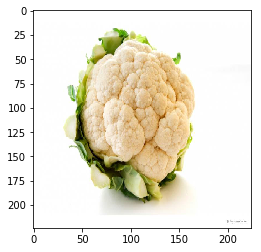

In [22]:
plt.imshow(img)

TO DO: beschrijving

In [23]:
prediction = vgg19_full.predict(x)
print(prediction.shape)
for pred in decode_predictions(prediction)[0]:
        print(pred)


NameError: name 'vgg19_full' is not defined

## Train your own classifier

In [14]:
## ADD MORE IMAGES AND SMALLER IMAGES SPEEDS UP

In [1]:
from keras.applications import inception_v3

Using TensorFlow backend.


In [2]:
# Instantiate the architecture, with pre-trained parameters from ImageNet
# but without the final (top) layer of object classification
# and averaging (avg) the output feature maps to get a constant size feature vector
# Inception is faster than VGG19 in training
model = inception_v3.InceptionV3(include_top=False, pooling='avg', weights='imagenet')
#model = VGG19(include_top=False, pooling='avg', weights='imagenet')

In [3]:
## Building classifier

In [4]:
#model = inception_v3.InceptionV3(include_top=False, pooling='avg', weights='imagenet')

def extract_features(img):
    x = np.expand_dims(img.astype(np.float32), axis=0)  # Make a batch of 1 image by expanding the first dimension
    x = inception_v3.preprocess_input(x)  # Preprocess the input image ([0,255] range to [-1,+1])
    return model.predict(x)[0]  # Make the batch goes through the network and convert the batch back to single image

In [25]:
from glob import glob
from tqdm import tqdm

# Gather the image files in each directory
filenames_bakfiets = glob('data/bakfiets/*.jpg')
print("Number of training positive files : {}".format(len(filenames_bakfiets)))
filenames_random = glob('data/random/*.jpg')
print("Number of training negative files : {}".format(len(filenames_random)))
filenames_test = glob('data/test/*.jpg')
print("Number of test files : {}".format(len(filenames_test)))

Number of training positive files : 24
Number of training negative files : 12
Number of test files : 7


In [26]:
features = []
labels = []
# Extracting features for the positive images
for filename in tqdm(filenames_bakfiets, desc='Computing features for bakfiets images'):
    img = io.imread(filename)
    # Add the CNN features to the list
    features.append(extract_features(img))
    # Add the positive label to the list
    labels.append(1.)
# Extracting features for the negative images
for filename in tqdm(filenames_random, desc='Computing features for random images'):
    img = io.imread(filename)
    # Add the CNN features to the list
    features.append(extract_features(img))
    # Add the negative label to the list
    labels.append(0.)
features = np.stack(features)
labels = np.array(labels)

Computing features for bakfiets images:   0%|          | 0/24 [00:00<?, ?it/s]


NameError: name 'extract_features' is not defined

In [10]:
print(features.shape)
print(features)

(36, 2048)
[[0.13411948 0.30233747 0.15756145 ... 0.16271488 0.24304846 0.34224725]
 [0.09755987 0.13348146 0.1025316  ... 0.20512898 0.14899969 0.25058568]
 [0.15465088 0.06735083 0.16744918 ... 0.11803865 0.14359917 0.21842442]
 ...
 [0.20696186 0.1714827  0.06869043 ... 0.05591653 0.18016326 0.31207532]
 [0.4222468  0.10495638 0.26702428 ... 0.5144506  0.7541906  0.38205412]
 [0.36056176 0.36211303 0.07993904 ... 0.47336817 0.25411373 0.33545062]]


In [11]:
print(labels)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
from sklearn.svm import SVC

# Instantiate a classifier that will predict a probability
classifier = SVC(probability=True, kernel='linear')
# Train the binary classifier from the extracted features and telling it which images are the good ones with the labels
classifier.fit(features, labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Predicting: 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]


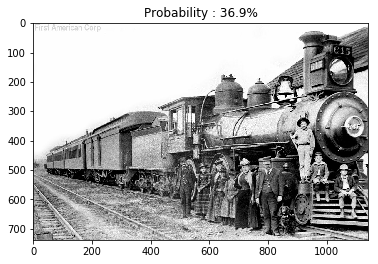

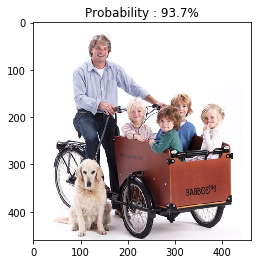

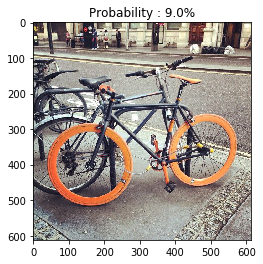

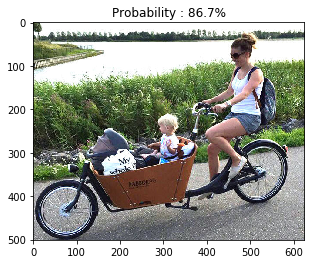

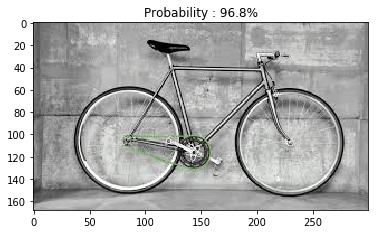

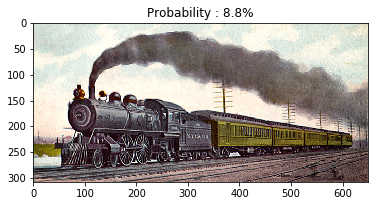

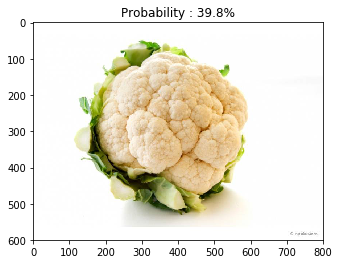

In [13]:
# For each image in the test data
for filename in tqdm(filenames_test, desc="Predicting"):
    # Load the image
    img = io.imread(filename)
    # Extract the features
    feat = extract_features(img)
    # Get the probabilities for the computed features
    probs = classifier.predict_proba(np.expand_dims(feat, axis=0))[0]
    prob_bakfiets = probs[1]  # probs[0] would be the probability of negative class, probs[1] is for the positive class
    # Display the results
    plt.figure()
    plt.imshow(img)
    plt.title("Probability : {:.01f}%".format(100*prob_bakfiets))

## Face detection

In [15]:
import face_recognition as fr

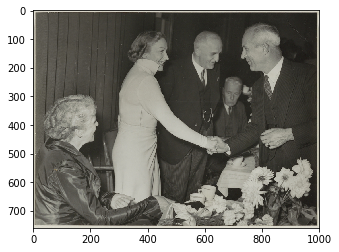

In [19]:
img_path = join('images', 'faces', 'face.jpg')
img = fr.load_image_file(img_path)
plt.imshow(img)

In [18]:
face_locations = fr.face_locations(img, 1, model='cnn')

In [20]:
face_locations

[(99, 812, 198, 713),
 (109, 483, 208, 385),
 (273, 721, 330, 664),
 (118, 657, 200, 575)]

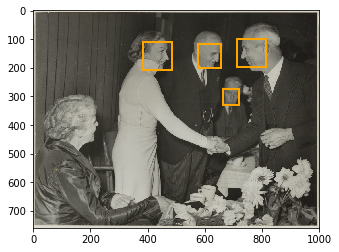

In [21]:
fig,ax = plt.subplots(1,1)
plt.imshow(img)
n, m, d = img.shape
for face in face_locations:
    rect = plt.Rectangle((face[3], face[0]), face[2] - face[0], face[1] - face[3],
                         edgecolor='orange', linewidth=2, facecolor='none')
    ax.add_patch(rect)